In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json


plt.style.use('seaborn-v0_8-pastel')
sns.set_palette("pastel")

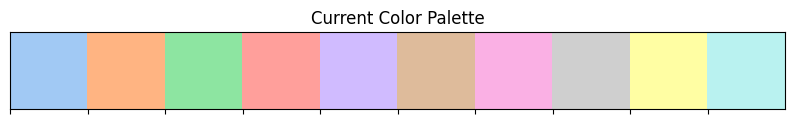

In [ ]:
# Get the current color palette
current_palette = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plot the colors in the palette
sns.palplot(current_palette)
plt.title("Current Color Palette")
plt.show()

# Data Reading
It is observed that the dataset is not in the default format that can be read by using default functions, thus we will read the dataset line by line and parse it accordingly. Once the json is parsed, We will convert it to Pandas dataframe.

In [ ]:
# Reading the JSON file
path = '/content/electronics.json'
with open(path, 'r') as file:
    data_json = json.load(file)

# Converting the JSON object to a pandas DataFrame
data = pd.json_normalize(data_json)
data.head()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer


# Analyzing Datatypes

Before doing any analyis, it is important to analyze the datatypes of dataset. Due to a different methodology of reading the dataset, We can clearly see that every feature is shown as "object" right now. We need to change these columns accordingly.

In [ ]:
# Get the data types of all columns
print(data.dtypes)

Customer_ID                      object
Age                              object
Gender                           object
Income_Level                     object
Address                          object
Transaction_ID                   object
Purchase_Date                    object
Product_ID                       object
Product_Category                 object
Brand                            object
Purchase_Amount                  object
Average_Spending_Per_Purchase    object
Purchase_Frequency_Per_Month     object
Brand_Affinity_Score             object
Product_Category_Preferences     object
Month                            object
Year                             object
Season                           object
dtype: object


## Conversion of Datatypes
The manual verification of dataset shows that there are some categorical (qualitative) features however there are some numerical (quantitative) features. We will convert them accordingly.

In [ ]:
# Convert numerical columns to numeric type
numerical_columns = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
                     'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Convert 'Purchase_Date' to datetime
data['Purchase_Date'] = pd.to_datetime(data['Purchase_Date'], errors='coerce')

# Convert categorical columns to 'category' data type
categorical_columns = ['Gender', 'Income_Level', 'Product_Category', 'Brand',
                       'Product_Category_Preferences', 'Season']
data[categorical_columns] = data[categorical_columns].astype('category')

data['Month'] = pd.to_numeric(data['Month'], errors='coerce').astype('Int64')
data['Year'] = pd.to_numeric(data['Year'], errors='coerce').astype('Int64')

print(data.dtypes)

Customer_ID                              object
Age                                     float64
Gender                                 category
Income_Level                           category
Address                                  object
Transaction_ID                           object
Purchase_Date                    datetime64[ns]
Product_ID                               object
Product_Category                       category
Brand                                  category
Purchase_Amount                         float64
Average_Spending_Per_Purchase           float64
Purchase_Frequency_Per_Month            float64
Brand_Affinity_Score                    float64
Product_Category_Preferences           category
Month                                     Int64
Year                                      Int64
Season                                 category
dtype: object


In [ ]:
data.head()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40.0,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193.0,59.0,2.0,2.0,Low,1,2010,Winter
1,,25.0,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318.0,77.0,2.0,1.0,Low,8,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57.0,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197.0,100.0,9.0,1.0,Low,<NA>,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38.0,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262.0,97.0,3.0,4.0,Low,9,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68.0,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429.0,85.0,7.0,2.0,High,1,2010,Summer


# Descriptive Analysis
A brief overview summary of descriptive analysis for the dataset is very important to understand the nature of dataset, specially to analyze the missing values.

In [ ]:
np.shape(data)

(1000, 18)

In [ ]:
descriptive_stats = data.describe()
descriptive_stats

,Age,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year
count,960.000000,951.000000,960.000000,945.000000,939.000000,947.0,948.0
mean,49.885417,250.629863,51.603125,5.437037,5.369542,6.564942,1997.0
std,18.482283,141.017012,27.104859,2.845325,2.843608,3.442791,15.509714
min,18.000000,10.000000,5.000000,1.000000,1.000000,1.0,1970.0
25%,34.000000,132.000000,29.000000,3.000000,3.000000,4.0,1984.0
50%,50.000000,246.000000,50.000000,5.000000,5.000000,6.0,1997.0
75%,66.000000,376.000000,74.000000,8.000000,8.000000,10.0,2011.0
max,80.000000,500.000000,100.000000,10.000000,10.000000,12.0,2023.0


In [ ]:
# checking for missing values after conversion
new_missing_values = data.isnull().sum()
new_missing_values

Customer_ID                       0
Age                              40
Gender                            0
Income_Level                      0
Address                           0
Transaction_ID                    0
Purchase_Date                    48
Product_ID                        0
Product_Category                  0
Brand                             0
Purchase_Amount                  49
Average_Spending_Per_Purchase    40
Purchase_Frequency_Per_Month     55
Brand_Affinity_Score             61
Product_Category_Preferences      0
Month                            53
Year                             52
Season                            0
dtype: int64

# Data Cleaning

## Missing values
It is really important to analyze all features and check accordingly. If any column has a very high percentage of missing values (typically, more than 50-60%), it might be worth considering dropping the column. However, in this dataset, it seems that the maximum missingness in any column is not exceedingly high. Now the need is to check all features one by one, and check if we can use mean or median for imputation. The choice between mean and median depends on the distribution of feature. If it's normally distributed, mean is suitable; if skewed, median is preferable as it is more robust to outliers and skewed distributions. It represents the middle value.

Now we will analyze every feature one by one:

### Age:
The histogram of Age suggests that the distribution is relatively symmetric and does not show extreme skewness. Therefore, we can use the mean for imputation.

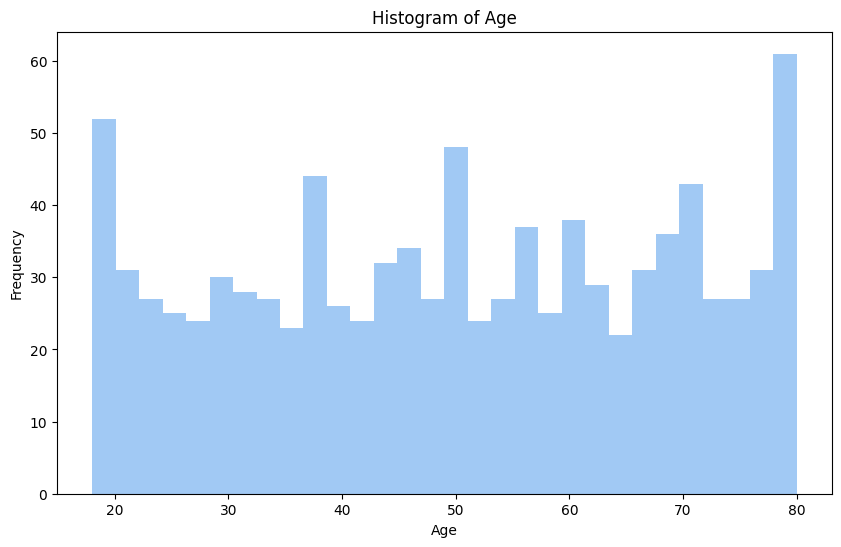

In [ ]:
plt.figure(figsize=(10, 6))
data['Age'].hist(bins=30)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


After this mean imputation there will be 0 null values in Age feature.

In [ ]:
age_mean = data['Age'].mean()
print("imputing with: ", age_mean)
data['Age'].fillna(age_mean, inplace=True)

imputing with:  49.885416666666664


### Purchase Ammount:
The histogram of Purchase ammount appears somewhat skewed. Median imputation might be more appropriate here.

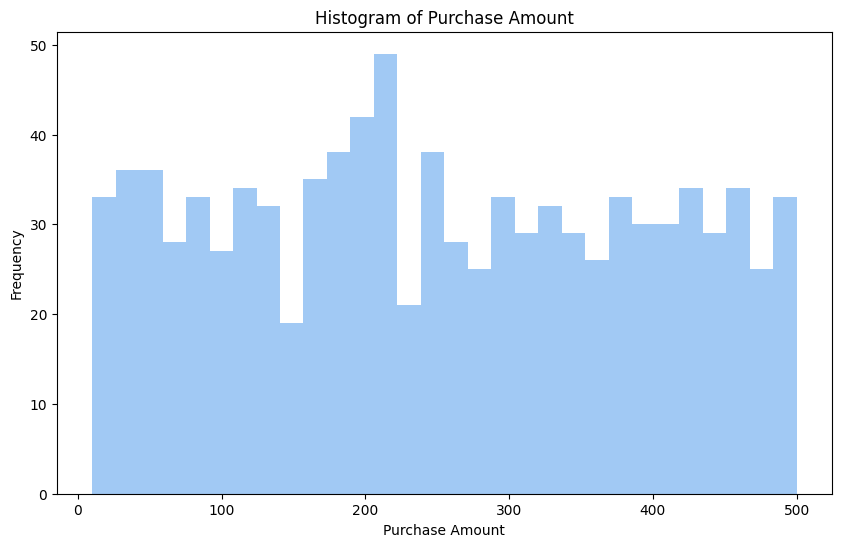

In [ ]:
plt.figure(figsize=(10, 6))
data['Purchase_Amount'].hist(bins=30)
plt.title('Histogram of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [ ]:
purchase_amount_median = data['Purchase_Amount'].median()
print("imputing with: ", purchase_amount_median)
data['Purchase_Amount'].fillna(purchase_amount_median, inplace=True)

imputing with:  246.0


### Average Spending Per Purchase:
This distribution also seems slightly skewed. Median imputation would be suitable.

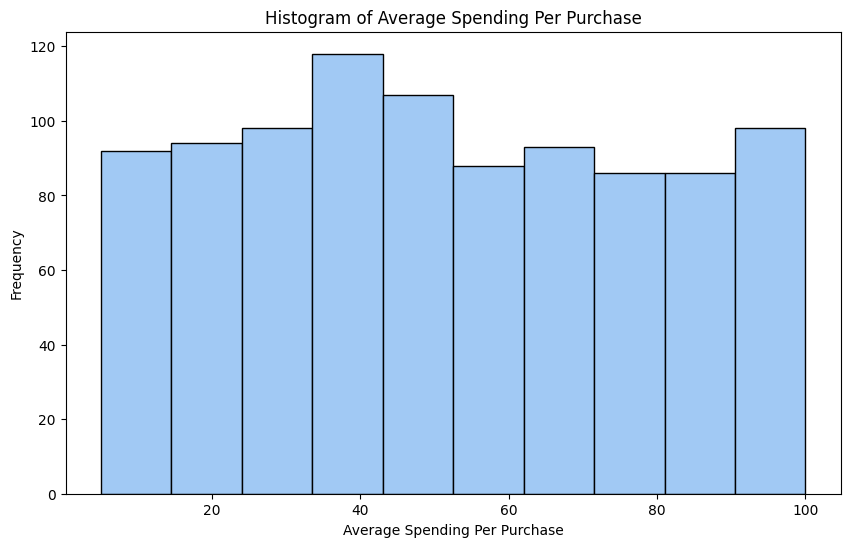

In [ ]:
plt.figure(figsize=(10, 6))
data['Average_Spending_Per_Purchase'].hist(edgecolor='black')
plt.title('Histogram of Average Spending Per Purchase')
plt.xlabel('Average Spending Per Purchase')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [ ]:
average_spending_median = data['Average_Spending_Per_Purchase'].median()
print("imputing with: ", average_spending_median)
data['Average_Spending_Per_Purchase'].fillna(average_spending_median, inplace=True)

imputing with:  50.0


### Purchase Frequency Per Month
The distribution is relatively symmetric, making mean imputation a good choice.

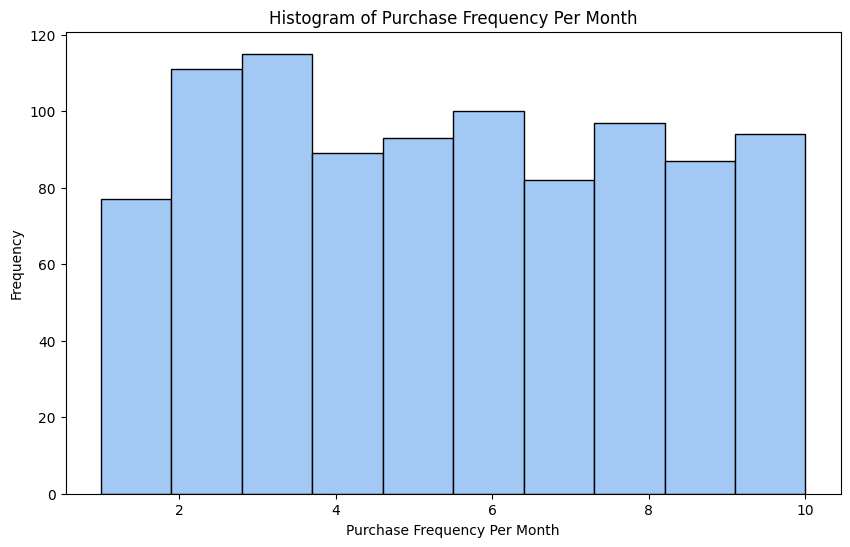

In [ ]:
plt.figure(figsize=(10, 6))
data['Purchase_Frequency_Per_Month'].hist(edgecolor='black')
plt.title('Histogram of Purchase Frequency Per Month')
plt.xlabel('Purchase Frequency Per Month')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [ ]:
purchase_frequency_mean = data['Purchase_Frequency_Per_Month'].mean()
print("imputing with: ", purchase_frequency_mean)
data['Purchase_Frequency_Per_Month'].fillna(purchase_frequency_mean, inplace=True)

imputing with:  5.437037037037037


### Brand Affinity Score:
This distribution is fairly uniform. We will use mean imputation here

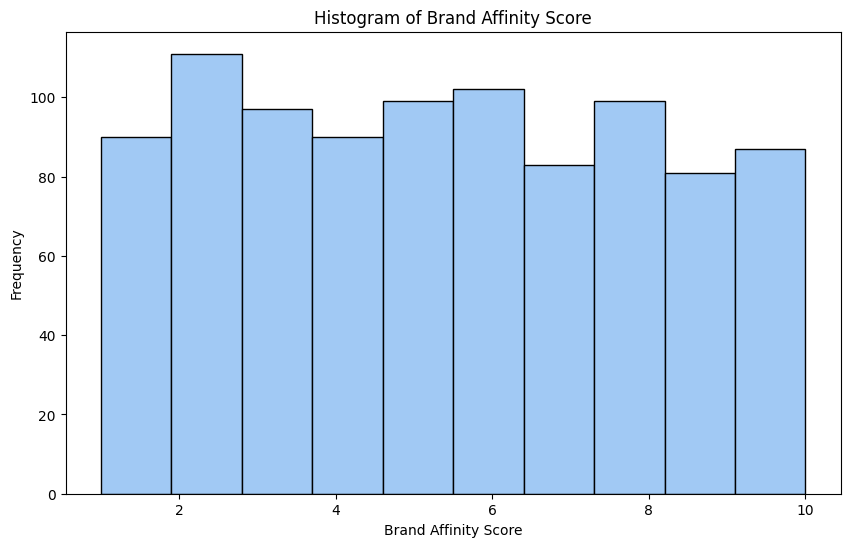

In [ ]:
plt.figure(figsize=(10, 6))
data['Brand_Affinity_Score'].hist(edgecolor='black')
plt.title('Histogram of Brand Affinity Score')
plt.xlabel('Brand Affinity Score')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [ ]:
brand_affinity_mean = data['Brand_Affinity_Score'].mean()
print("imputing with: ", brand_affinity_mean)
data['Brand_Affinity_Score'].fillna(brand_affinity_mean, inplace=True)

imputing with:  5.369542066027689


### Year:
This is a significant time marker, using the median (a more robust measure) could be a reasonable approach, using the median is often a safer choice to avoid introducing bias, especially if the dataset spans several years where the mean could be affected by historical data trends. Moreover, another point is that mean can provide non-numeric values (in decimal) which doesn't make sense in case of Year.

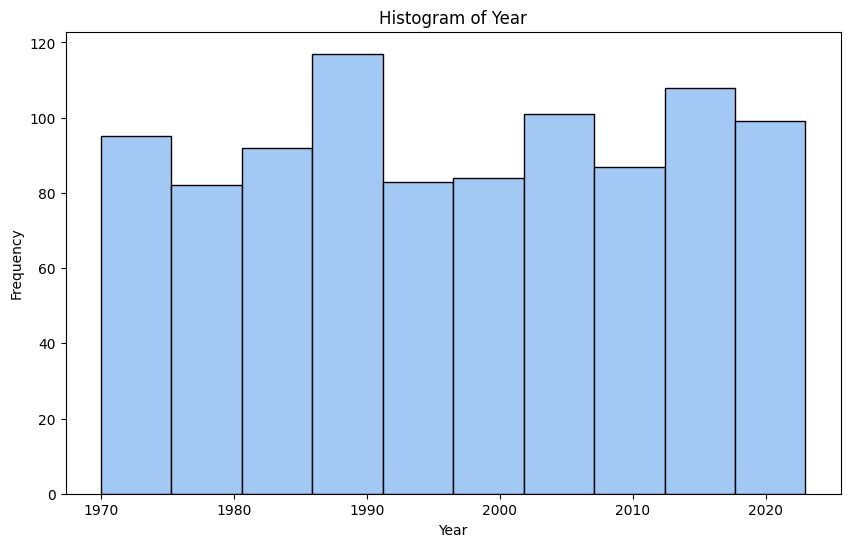

In [ ]:
plt.figure(figsize=(10, 6))
data['Year'].hist(edgecolor='black')
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [ ]:
year_median = data['Year'].median()
print("imputing with: ", year_median)
data['Year'].fillna(year_median, inplace=True)

imputing with:  1997.0


### Month:
Similar methodology that are implemented for Year would be used for Month as it is also a time marker.

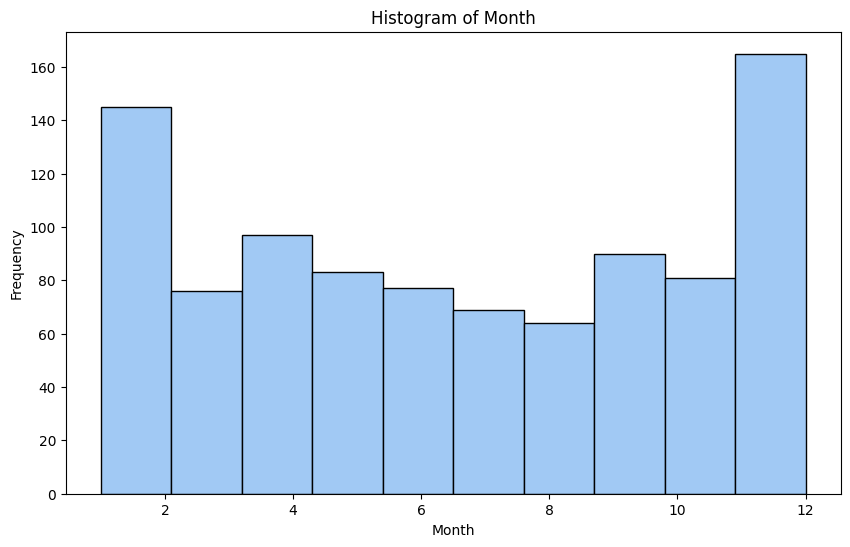

In [ ]:
plt.figure(figsize=(10, 6))
data['Month'].hist(edgecolor='black')
plt.title('Histogram of Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


In [ ]:
month_median = data['Month'].median()
print("imputing with: ", month_median)
data['Month'].fillna(month_median, inplace=True)

imputing with:  6.0


### Purchase Date:
Given that the dataset contains 1000 rows and only 48 are missing Purchase_Date, this represents 4.8% of dataset. Since the missing Purchase_Date data is less than 5% of the total dataset, it is reasonable to simply drop these rows. This is often the simplest and most straightforward approach, especially if the missing dates are randomly distributed and their removal won't introduce significant bias.

In [ ]:
data.dropna(subset=['Purchase_Date'], inplace=True)

## Outlier Detection
In data cleaning, it's important to check outliers and their influence on datasets. Outliers are only associated with numerical variables. So, to detect outliers We will plot box-plot of all numerical variables.

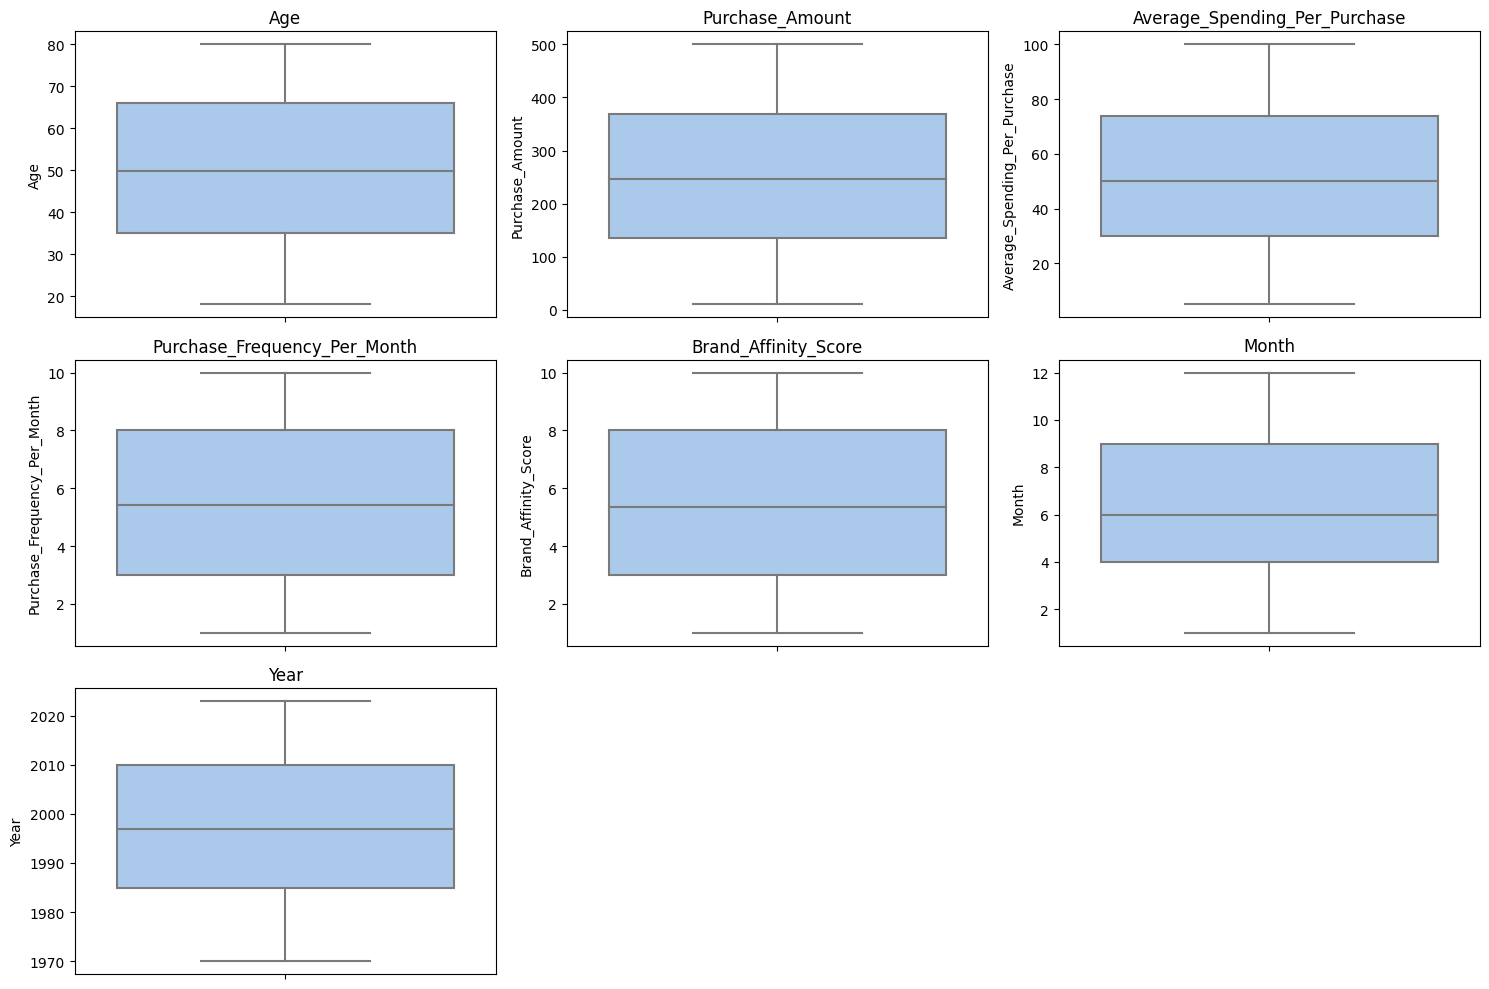

In [ ]:
numerical_columns = [
    'Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
    'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Month', 'Year'
]

# Creating box plots for each numerical column
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Although the Box plots clearly shows their are no outliers in any numerical column, still to verify, We will further implement Interquartile Range (IQR) method to verify that there is no outlier. The IQR method typically considers values as outliers if they are below the 1st quartile - 1.5 * IQR or above the 3rd quartile + 1.5 * IQR.
By the outcome of the following code snippet it is further established that there is no outlier that is need to reduced/normalized or removed.

In [ ]:
# Calculate IQR for each numerical column
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Determine the outliers for each column
outliers = ((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR)))

# Count of outliers in each column
outlier_counts = outliers.sum()
print(outlier_counts)

Age                              0
Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
Month                            0
Year                             0
dtype: int64


## Descriptive Analysis After Cleaning
As there are multiple changes in features and some of the rows are dropped, The descriptive Analysis is completly changed, with different stats altogeather.

In [ ]:
np.shape(data)

(952, 18)

In [ ]:
descriptive_stats = data.describe()
descriptive_stats

,Age,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.0,952.0
mean,49.855961,250.070378,51.781513,5.464130,5.359425,6.494748,1997.048319
std,18.252111,138.221177,26.506880,2.760788,2.752536,3.336377,15.127422
min,18.000000,10.000000,5.000000,1.000000,1.000000,1.0,1970.0
25%,35.000000,135.000000,30.000000,3.000000,3.000000,4.0,1985.0
50%,49.885417,246.000000,50.000000,5.437037,5.369542,6.0,1997.0
75%,66.000000,369.000000,74.000000,8.000000,8.000000,9.0,2010.0
max,80.000000,500.000000,100.000000,10.000000,10.000000,12.0,2023.0


In [ ]:
# Rechecking for missing values after conversion
new_missing_values = data.isnull().sum()
new_missing_values

Customer_ID                      0
Age                              0
Gender                           0
Income_Level                     0
Address                          0
Transaction_ID                   0
Purchase_Date                    0
Product_ID                       0
Product_Category                 0
Brand                            0
Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
Product_Category_Preferences     0
Month                            0
Year                             0
Season                           0
dtype: int64

## Data Saving
Now save this cleaned dataset for further exploration

In [ ]:
data.to_csv('cleaned_datatset_952_rows.csv', index=False)